In [1]:
# NLP section 1: dataset googleplaystore reviews

In [2]:
# Natural Language Processing - Data pre-processing

In [3]:
# BAG OF WORDS

In [1]:
##Cleaning text
import re
#A regular expression (or RE) specifies a set of strings 
#that matches it; the functions in this module let you check
#if a particular string matches a given regular expression (or if a given regular expression matches a particular string, which comes down to the same thing).



import time
import nltk
# https://www.machinelearningplus.com/nlp/gensim-tutorial/
import gensim # used for topic modelling
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import wordnet

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

/Applications/anaconda3/lib/python3.7/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/AirMorena/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/AirMorena/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/AirMorena/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# import data from local disk
data = pd.read_csv('/Users/AirMorena/Desktop/final_proj/csv/data_clean.csv')

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Reviewslog,Current Ver_clean,year,month,day,month_year
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,6.874198,2.0,2018,1,15,2018-01
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,It bad >:(,Negative,-0.725,0.833333,6.874198,2.0,2018,1,15,2018-01
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,like,Neutral,0.000,0.000000,6.874198,2.0,2018,1,15,2018-01
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,NaN,NaN,NaN,NaN,6.874198,2.0,2018,1,15,2018-01
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,I love colors inspyering,Positive,0.500,0.600000,6.874198,2.0,2018,1,15,2018-01


In [4]:
data.shape

(41661, 23)

In [5]:
# timeit function
start = time.time()

# CountVectorizer: Convert a collection of text documents to a matrix of token counts
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

matrix = CountVectorizer(max_features=1000)
# build a vocabulary that only consider the top max_features ordered by term frequency across the corpus

X = matrix.fit_transform(data['Translated_Review']).toarray()
# fit_transform is a method that is apply to the matrix (the matrix is an object)
# fit_transform: Learn the vocabulary dictionary and return term-document matrix.

end = time.time()
print("It took {} sec to fit and transform all documents.".format(end - start))

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [11]:
matrix

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [12]:
X.shape

(40414, 1000)

In [13]:
type(X)

numpy.ndarray

In [14]:
# X is a matrix, each vector is one review, print X
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
# Dictionary of words
matrix.vocabulary_

{'ads': 30,
 'the': 863,
 'app': 60,
 'let': 477,
 'kids': 457,
 'it': 445,
 'bad': 83,
 'like': 481,
 'love': 510,
 'colors': 175,
 'hate': 393,
 'cute': 213,
 'enjoyable': 274,
 'fun': 348,
 'horrible': 410,
 'even': 283,
 'color': 174,
 'sure': 841,
 'game': 353,
 'too': 884,
 'many': 521,
 'missing': 541,
 'good': 374,
 'great': 379,
 'ok': 588,
 'this': 872,
 'beautiful': 95,
 'perfect': 627,
 'book': 110,
 'and': 49,
 'books': 112,
 'easy': 262,
 'try': 897,
 'around': 67,
 'end': 270,
 'something': 800,
 'want': 944,
 'least': 473,
 'enough': 277,
 'options': 603,
 'however': 416,
 'despite': 231,
 'that': 861,
 'can': 138,
 'my': 557,
 'full': 347,
 'review': 725,
 'wanted': 945,
 'access': 14,
 'pictures': 638,
 'don': 249,
 'need': 559,
 'needs': 561,
 'way': 951,
 'im': 423,
 'paying': 621,
 'free': 338,
 'apps': 64,
 'uninstall': 909,
 'immediately': 426,
 'real': 699,
 'either': 266,
 'really': 700,
 'enjoying': 276,
 'application': 62,
 'complaint': 181,
 'small': 794,
 '

In [16]:
# length of the dictionnary is 1000 words
len(matrix.vocabulary_)

1000

In [17]:
# store the dictionnary into bow_dict
bow_dict= matrix.vocabulary_

In [18]:
def visualize_wordcloud_dict_frequencies(dict_freqs, title, relative_scaling=0.5, max_words=100,
                               background_color='black'):
    plt.figure(figsize=(10, 10))
    wordcloud = WordCloud(width=900, height=500, max_words=max_words, relative_scaling=relative_scaling,
                         normalize_plurals=False, background_color=background_color).generate_from_frequencies(
       dict_freqs)
    plt.title(title)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

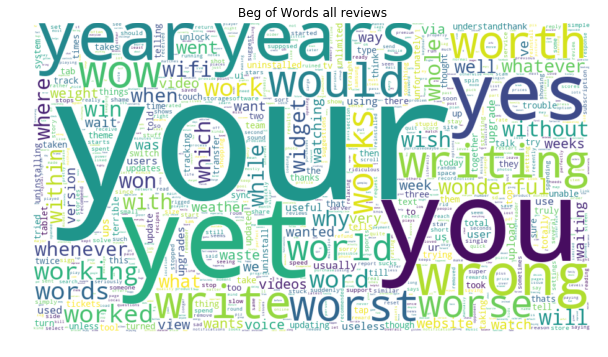

In [19]:
# word cloud: this is not normalised, so we will show which woor
title='Beg of Words all reviews'
dict_freqs=bow_dict

visualize_wordcloud_dict_frequencies (dict_freqs, title, relative_scaling=0.5, max_words=1000,
                               background_color='white')